In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing all the packages
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, RuntimeWarning))
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , cross_val_score
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,  StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve, auc, roc_auc_score
from sklearn import svm
%matplotlib inline


In [0]:
# loading the data

df =pd.read_csv('drive/My Drive/bank-full.csv')

In [0]:
# reading the first ten values of the data
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
# getting the information of the data like what are the columns , datatype of columns .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Input variables:

# bank client data:

1 - Age (numeric)   : Describes the age of the client.

2 - Job :  Describes type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-
employed','services','student','technician','unemployed','unknown')

3 - Marital : Describes the marital status of the client (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - Education : Describes the type of Eduacation , client holds. (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','u
nknown')

5 - Default: Describes whether client has credit in default or not  (categorical: 'no','yes','unknown')

6 - Housing: has housing loan or not (categorical: 'no','yes','unknown')

7 - Loan: has personal loan or not (categorical: 'no','yes','unknown')

8- Balance : The  remaining balance in the account of the  client.(numerical)

# related with the last contact of the current campaign:

9 - Contact: contact communication type (categorical: 'cellular','telephone', 'unknown')

10 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - Day: last contact day of the week (numerical)

12 - Duration: last contact duration, in seconds (numeric).

# other attributes:

13 - Campaign: number of contacts performed during this campaign and for this client
(numeric, includes last contact)

14 - Pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)

15 - Previous: number of contacts performed before this campaign and for this client
(numeric)

16 - Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

# Output variable (desired target ) :

17 - Target : has the client subscribed a term deposit? (binary: 'yes','no')

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [0]:
# some basic calculations


# some Insights of the data

1) Balance minimum value is -8019 means there are  clients who are  repaying  the amount. The maximum is nearly 1,000,00.

2) The age is between 18 to 95 .  Data contains people of all ages. 

3)  As pdays max value is 871 .It means every  client in the data is contacted in the previous campaigns.
Pdays has minimum  value as -1 whixh seems to be some data entry problem or whether the data is not available.


In [0]:

#Continuous Variables
contVar = np.array(['age', 'balance', 'day', 'duration', 'campaign','pdays', 'previous'])

#categorical variables
catVar =np.array(['job','marital','education','default','housing','loan' ,'contact' ,'month','poutcome'])

# Predicted Value
Predict =np.array(['Target'])

In [0]:
# function to draw the multiple graphs simultaneously
def drawplot(dt, rows, col):
    fig ,axs= plt.subplots(nrows=rows , ncols=col, figsize= (20,20))

    for i in range(0,len(contVar)):
        sns.distplot(df[contVar[i]],ax= axs[i,0])
        sns.boxplot(x=contVar[i] ,data=df, ax= axs[i,1])

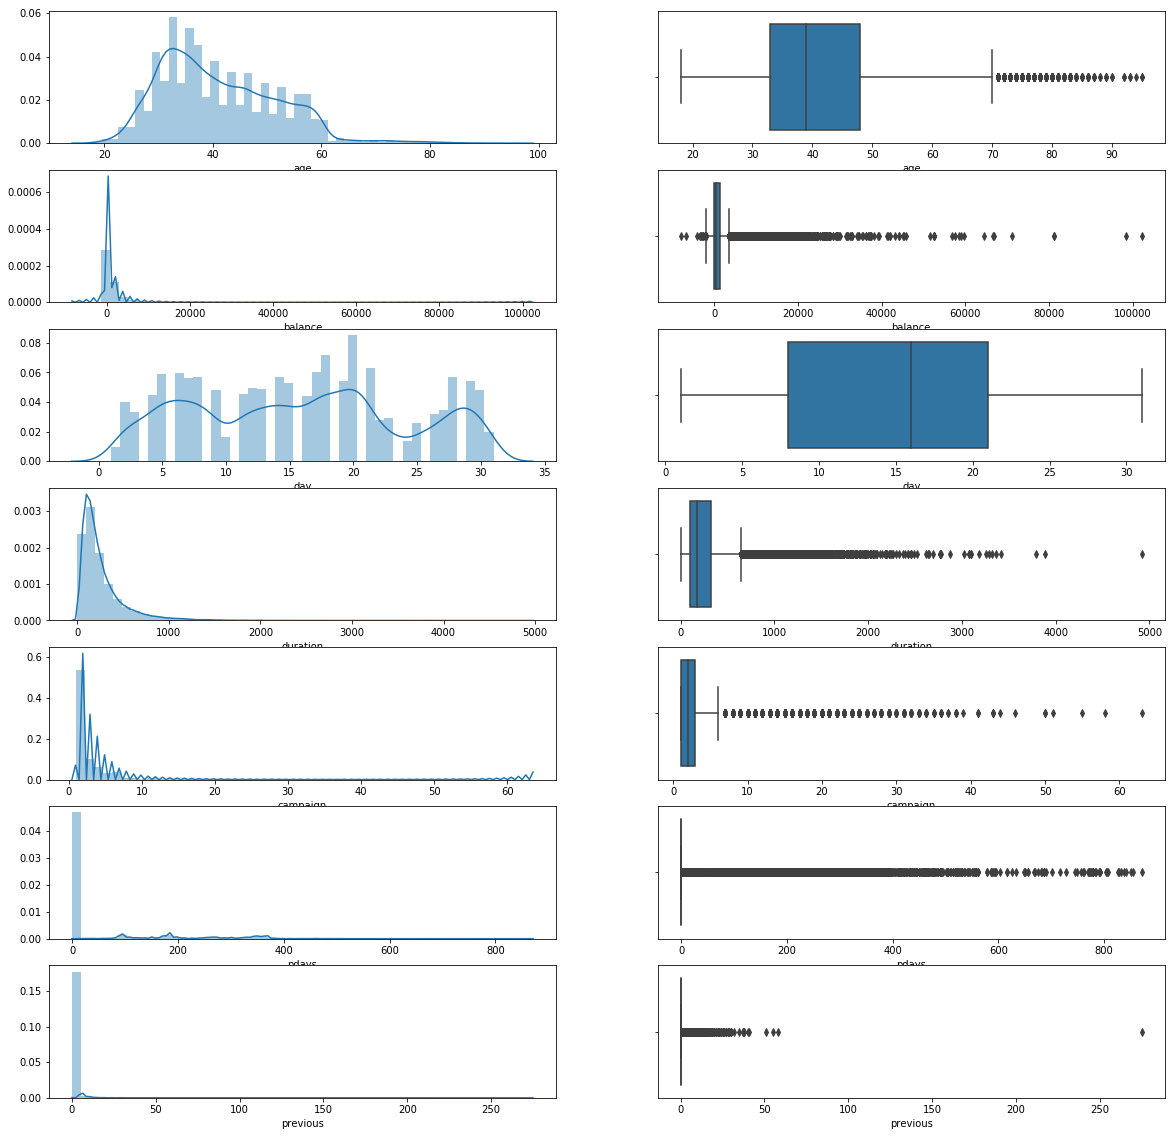

In [0]:
drawplot(df, rows=7, col=2)

# Some insights of the data

1) Age  seems to be right skewed . The people more than 70 years  who have accounts are considered as outliers . May be there accounts  are operated by their children 

2) Balance seems to be right skewed .There are all categories of people  i.e, people having negative amount , positive but less amount  and people having high amount. It means there are good depositors and borrowers also.

3) After analysing the day  column , it seems bank  contacts its  costumer nearly every day of the month

4)Duration is higly right skewed .It means there are clients with whom the bank has lot of discussions , may be such clients are interested in taking bank services.

5)Pdays 75% entries is -1 .It seems  there is no information related to this field

6)Previous shows  most of the clients are not contacted previously.

In [0]:
# Getting the value count for personal loan column
df[Predict[0]].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

 Here we can see that the  term depositors are  11% of the total costumers. This will affect the model as it get more tarined for non depositors and become bias in predicting the output.

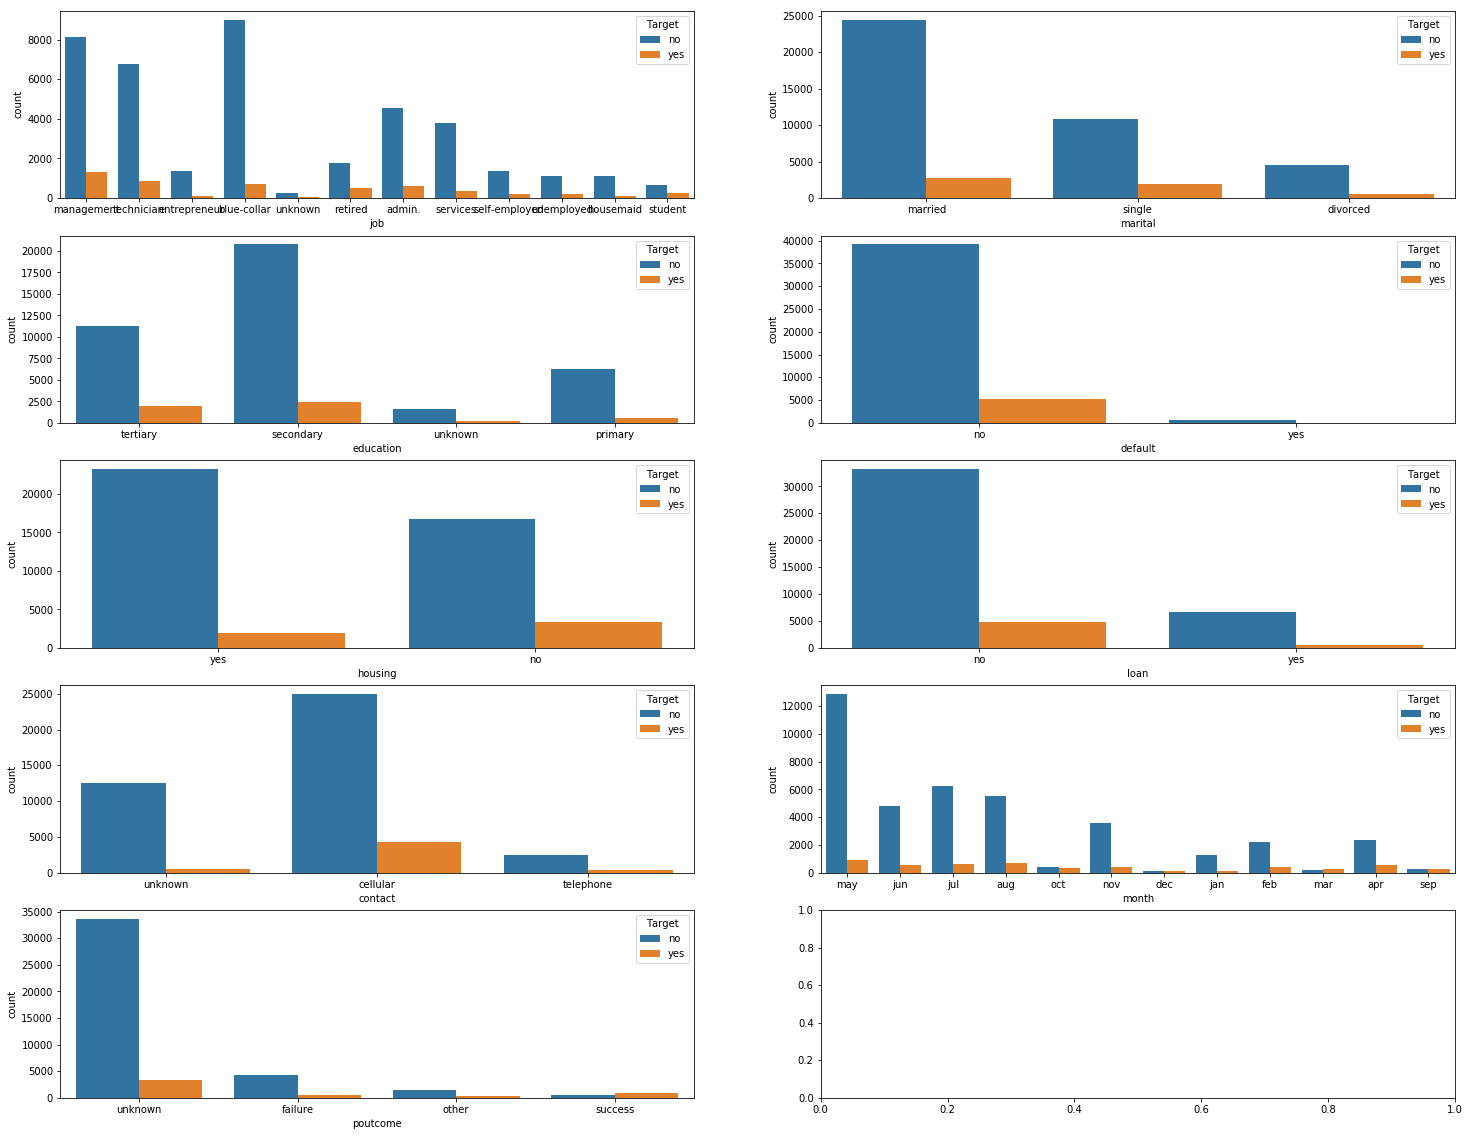

In [0]:
# Analysis of categorical variable

fg,axs= plt.subplots(nrows=5, ncols=2, figsize=(25,20))
for i in range(0, len(catVar)):
    row = int(i/2)
    col= (i)-(2*row)
    sns.countplot(x=catVar[i] , hue= Predict[0] ,data=df, ax =axs[row,col])

# Some insights

1) Persons having no  loans seems to have more chances to have term deposit.

2)Most persons are contacted in the month of May , June , July , Augsut.In the month of October , December , March  and September have  very less conatacts . Possibly  these are festive seasons.

3) Poutcome has  most of the values as unknown .So it is  relevant to drop this column  in model prediction.

4) Job , education and  contact  have also some unknown values . We will try to fill them in furthur steps

In [0]:
# filling unknown values

# job column has very less unknown values anD Most of the clients are blue collared .Lets fill them 

pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [0]:
# After analysing this crosstab , we can see that primary and secondary  educated clients  can be considered as blue collared and most  of the tertiary educated clients are into management .
df.loc[(df['job'] =='unknown') & (df['education'] =='primary' )  , 'job'] = 'blue-collar'
df.loc[(df['job'] =='unknown') & (df['education'] =='secondary' )  , 'job'] = 'blue-collar'
df.loc[(df['job'] =='unknown') & (df['education'] =='unknown' )  , 'job'] = 'blue-collar'
df.loc[(df['job'] =='unknown') & (df['education'] =='tertiary' )  , 'job'] = 'management'

In [0]:
# Filling Education unknown values
df.loc[(df['education'] =='unknown') & (df['job'] =='admin.' )  , 'education'] = 'secondary'
df.loc[(df['education'] =='unknown') & (df['job'] =='blue-collar' )  , 'education'] = 'secondary'
df.loc[(df['education'] =='unknown') & (df['job'] =='entrepreneur' )  , 'education'] = 'tertiary'
df.loc[(df['education'] =='unknown') & (df['job'] =='housemaid' )  , 'education'] = 'primary'
df.loc[(df['education'] =='unknown') & (df['job'] =='management' )  , 'education'] = 'tertiary'
df.loc[(df['education'] =='unknown') & (df['job'] =='self-employed' )  , 'education'] = 'tertiary'
df.loc[(df['education'] =='unknown') & (df['job'] =='services' )  , 'education'] = 'secondary'
df.loc[(df['education'] =='unknown') & (df['job'] =='student' )  , 'education'] = 'secondary'
df.loc[(df['education'] =='unknown') & (df['job'] =='technician' )  , 'education'] = 'secondary'
df.loc[(df['education'] =='unknown') & (df['job'] =='unemployed' )  , 'education'] = 'secondary'
df.loc[(df['education'] =='unknown') & (df['job'] =='retired' )  , 'education'] = 'primary'


In [0]:
# As most of the people have jobs and possibly contains a cell phone . Hence lets fill all the values with cellular

df.loc[df['contact'] == 'unknown','contact'] = 'cellular'

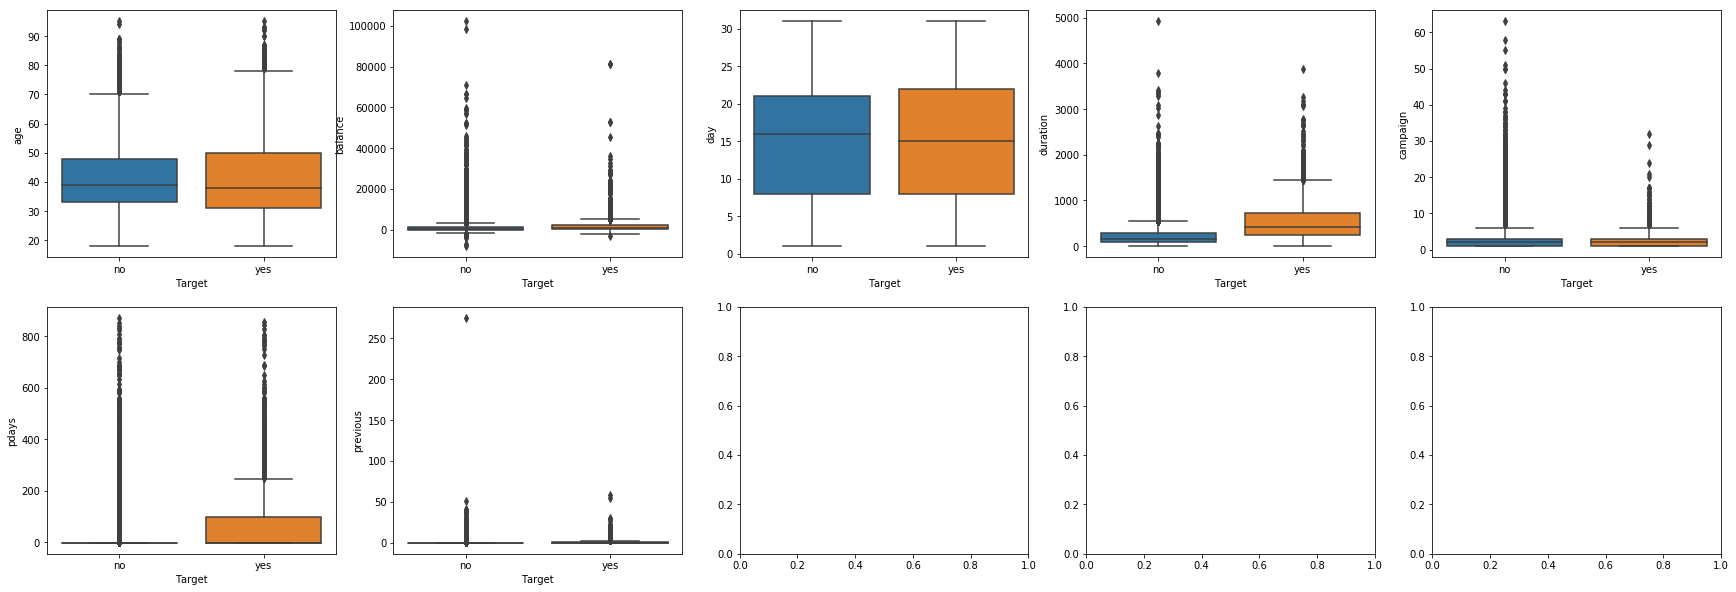

In [0]:

# Extracting some more information
fg,axs= plt.subplots(nrows=2, ncols=5, figsize=(30,10))
for i in range(0, len(contVar)):
    row = int(i/5)
    col= (i)-(5*row)
    sns.boxplot(y=contVar[i] , x= Predict[0] ,data=df, ax =axs[row,col])

The clients having term deposits have usually high duration calls.

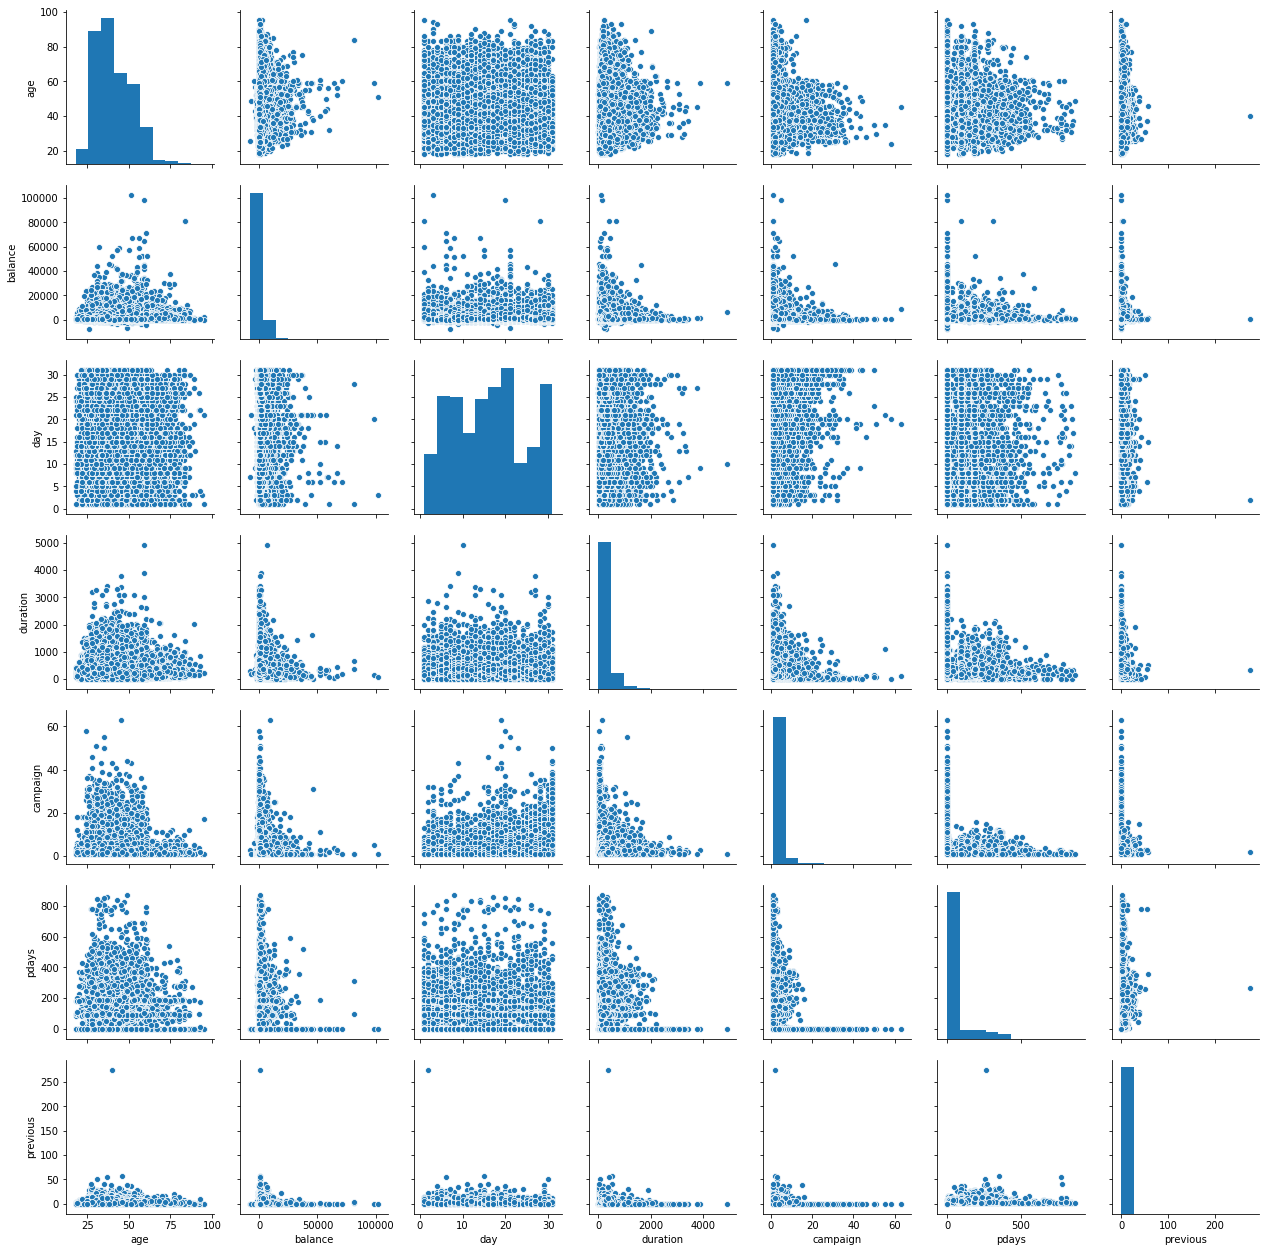

In [0]:
#getting the linear relation ships between the columns (BIVARIENT ANALYSIS)
sns.pairplot(df)

When  the balance is low ,  the duration is very high. As it is mostly 0 , may be the  person has never used  the bank services .There is some logx  relationship between the two.
Same trend is shown by the pdays and campaign.


In [0]:
## Label encoder
le = LabelEncoder()
for i in range(0 , len(catVar)):
  df[catVar[i]] = le.fit_transform(df[catVar[i]])  
  
df['Target'] = le.fit_transform(df['Target'])  

In [0]:
# Feature Engineering

# lets fill all the negative  values with 1  possibly it may be some error

df.loc[df['pdays'] ==-1 , 'pdays']= 1

# lets add more column 'anyLoan' , which is addition is addition of housing and loan . It will describe whether some one has taken laon or not . In chi-squarre test which is performed later seems to have good impact.
df['anyLoan'] = df['housing'] +df['loan']

# Try to categorise age into young ,medium,  old generation ( It is also called bining method)
df.loc[df['age'] <= 40 , 'age']=0
df.loc[(df['age'] <= 60) & (df['age'] >40) , 'age']=1
df.loc[ (df['age'] >60) , 'age']=2



In [0]:

# Applying ancova on continuous variable  to check the relationship between target variable and  continuous variable . If the p-value is less than 0.05 , then both are highly related .
p_val = []
for i in range(0, len(contVar)):
        
    form = contVar[i] + ' ~ ' + "Target"
    model = smf.ols(formula=form, data=df)
    results = model.fit()
    pval = float(results.summary().tables[0].data[3][3])
    p_val.append(pval)  

In [0]:
prb = pd.DataFrame(p_val, index=contVar, columns=['Target'])
prb.round(3)

,Target
age,0.0
balance,0.0
day,0.0
duration,0.0
campaign,0.0
pdays,0.0
previous,0.0


# All the continous variable seems to have good impact on  the model

In [0]:
# Applying ancova on categorical variable  to check the relationship between target variable and  categorical variable . If the p-value is less than 0.05 , then both are highly related .

catVar=  np.append(catVar,'anyLoan')
chi2, p_values =[], []

for f in range(0,len(catVar)):
        chitest = chi2_contingency(pd.crosstab(df[catVar[f]], df['Target']) )
        chi2.append(chitest[0])
        p_values.append(chitest[1])
  

In [0]:

prb_cat = pd.DataFrame(p_values, index=catVar, columns=['Target'])
prb_cat.round(3)

,Target
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
poutcome,0.0
anyLoan,0.0


# All the categorical variables seems to have good impact on the model.

In [0]:
## Use StandardScaler to transform the data
stnd = StandardScaler()
inputDataNorm = stnd.fit_transform(df)
dfInputDataNorm=pd.DataFrame(inputDataNorm, columns = df.columns)
dfInputDataNorm.shape

(45211, 18)

In [0]:
# Dropping the target variable , poutcome as it has almost unknown value , duration is something which is not known in production , thus dropping it.
dfInputData = df.drop(['duration','poutcome','Target'],axis=1)
dfTarget = df['Target']

In [0]:
def calculate_vif_(X, thresh=100):
    '''Method to compute VIF and drop the columns based on threshold value.'''
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True

    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        
        df_vif = pd.DataFrame()
        df_vif["VIF Factor"] = vif
        df_vif["features"] = cols[variables]
        print(df_vif.sort_values(by=['VIF Factor'], ascending=False))
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [0]:
dfInput = calculate_vif_(dfInputData,10)

    VIF Factor   features
6          inf    housing
7          inf       loan
14         inf    anyLoan
10    4.131635      month
9     4.110485        day
2     4.075915    marital
3     3.782080  education
1     2.706543        job
11    1.822856   campaign
0     1.738868        age
12    1.510493      pdays
13    1.342498   previous
5     1.232852    balance
8     1.109275    contact
4     1.029008    default
dropping 'housing' at index: 6
    VIF Factor   features
9     4.131635      month
8     4.110485        day
2     4.075915    marital
13    3.979040    anyLoan
3     3.782080  education
1     2.706543        job
6     2.006665       loan
10    1.822856   campaign
0     1.738868        age
11    1.510493      pdays
12    1.342498   previous
5     1.232852    balance
7     1.109275    contact
4     1.029008    default
Remaining variables:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 

In [0]:
# splitting the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(dfInput, dfTarget, test_size=0.3, random_state=7)

In [0]:
  # Grid search function , which applies Grid search cv on different models and provide us the best possible combination of hyper parameters  . This functiob also gives the best score , ROC curve
  
  def applyGridSrch(modelObj,param_grid,x_train,x_test, y_train, y_test, label):
    clf = RandomizedSearchCV(modelObj, param_grid, cv=5, scoring='f1', random_state =1)
    clf.fit(x_train, y_train)
    print("========================================================================")
    print("Best parameters set found on development set:" , clf.best_params_)
    print("========================================================================")
    print("Best Scores", clf.best_score_)
    print("========================================================================")
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print("========================================================================")
    print(means,stds)
    y_pred = clf.predict(x_test)
    ## Based on predicted value, compute various stats for model evaluation
    print("==========================================================================")
    print(label)
    print("==========================================================================")
    print('Accuracy Score: %.6f' % (accuracy_score(y_test,y_pred)*100))
    print('Confusion Matrix: ', confusion_matrix(y_test,y_pred), sep = '\n')
    print("==========================================================================")
    ## Classification report
    cr = classification_report(y_test, y_pred)
    print("Classification Report")
    print("==========================================================================")
    print(cr)
    print("==========================================================================")
    
    ## Calculating roc accuracy score and Gini coefficient
    fpr, tpr, thresh = roc_curve(y_pred, y_test)
    roc_auc = auc(fpr, tpr)
    
    print('ROC Value = %0.6f' % roc_auc)
    print("==========================================================================")
    
    ## Drwing ROC cureve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0,1], [0,1], color='navy', linestyle='--')
    
    #plt.plot(fpr[1], tpr[1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
       
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
        
    plt.show()
        

Best parameters set found on development set: {'C': 1000}
Best Scores 0.013094393542058347
Grid scores on development set:
[0.00580913 0.00893362 0.01257975 0.01258045 0.01153965 0.01257896
 0.01309439] [0.00350196 0.00209869 0.00383544 0.00383923 0.0026449  0.00580854
 0.00547086]
Logistic Regression
Accuracy Score: 88.668534
Confusion Matrix: 
[[12015    15]
 [ 1522    12]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12030
           1       0.44      0.01      0.02      1534

    accuracy                           0.89     13564
   macro avg       0.67      0.50      0.48     13564
weighted avg       0.84      0.89      0.84     13564

ROC Value = 0.666006


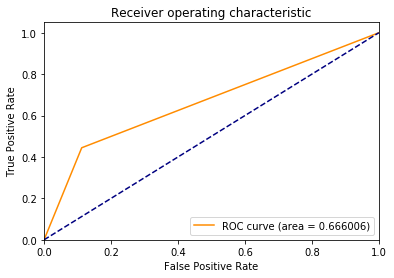

In [0]:
  # Applying logistic Regression  model. Logistic regresion affects significantly by outlier treatment
  classifier = LogisticRegression() 
  param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] } 
  applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"Logistic Regression")

As the data is completely baised towards the non term depositors , the linear regression is completely affected giving only .01 accuracy for term depositors . Hence we can't rely on this model.

Best parameters set found on development set: {'var_smoothing': 1e-09, 'priors': [0.5, 0.5]}
Best Scores 0.2770908265448686
Grid scores on development set:
[0.27709083 0.10205546 0.02910131 0.22534965 0.08927633 0.21213491
 0.02911228 0.21213491 0.06880882 0.2348998 ] [1.00968694e-02 9.54360813e-03 6.17478810e-03 1.83207998e-02
 1.17953379e-02 1.46775836e-05 6.88894395e-03 1.46775836e-05
 5.07687371e-03 1.94257261e-03]
KNN Neighbours
Accuracy Score: 52.528753
Confusion Matrix: 
[[5958 6072]
 [ 367 1167]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.50      0.65     12030
           1       0.16      0.76      0.27      1534

    accuracy                           0.53     13564
   macro avg       0.55      0.63      0.46     13564
weighted avg       0.85      0.53      0.61     13564

ROC Value = 0.551593


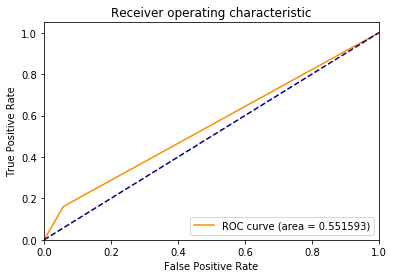

In [0]:
# Applying the NayeBaye's model.It is affected by outlier treatment
classifier = GaussianNB()
param_grid = {'var_smoothing':[1e-09,.0001,.001,0.1],'priors':[[0.1, 0.9],[0.2,0.8],[0.3,0.7],[0.7,0.3],[0.8,0.2],[0.9,0.1],[0.5,0.5]]} 
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"KNN Neighbours")


One of the  disadvantages of NB model is that it considers all the independent variables are not linked with each other . But multi collinearity always exits in data. 
Hence it fails to give good overall accuracy. Hence can't rely on this model.

Best parameters set found on development set: {'min_samples_leaf': 7, 'max_depth': 200}
Best Scores 0.31134369301105513
Grid scores on development set:
[0.3065468  0.31134369 0.28807244 0.27798614 0.28807244 0.3065468
 0.28848958 0.28807244 0.28807244 0.3065468 ] [0.01944486 0.02974974 0.01655526 0.01305953 0.01655526 0.01944486
 0.01549737 0.01655526 0.01655526 0.01944486]
Decision Tree
Accuracy Score: 87.370982
Confusion Matrix: 
[[11503   527]
 [ 1186   348]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12030
           1       0.40      0.23      0.29      1534

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.61     13564
weighted avg       0.85      0.87      0.86     13564

ROC Value = 0.652124


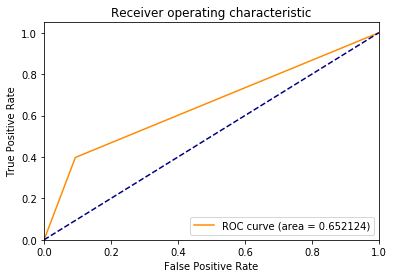

In [0]:
# Applying the Decision Tree model.Decision trees is not affected by the outlier treatment
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = "gini",random_state = 1) 
max_depth = [50 , 100, 150 , 200, 250 , 300, 350, 400]
min_samples_leaf = [2,3,4,5,6,7]
param_grid = {'max_depth': max_depth, 'min_samples_leaf' : min_samples_leaf}
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test,"Decision Tree")

Decisions Trees are genreally fast and simple to execute and are not much affected by scaling or outliers .
But if depth is not controlled , it some where leads to overfitting . In this case , it performs better than logistic in classifying  with 30% accuracy  for term depositors

Best parameters set found on development set: {'n_estimators': 500}
Best Scores 0.26200713830526356
Grid scores on development set:
[0.25444165 0.25067646 0.24988297 0.25058516 0.25073346 0.2583321
 0.25453333 0.25780327 0.26200714] [0.02186285 0.0236375  0.02214262 0.01737784 0.0243566  0.01926662
 0.01546954 0.01423873 0.01075481]
 Random Forest Decision Tree
Accuracy Score: 88.712769
Confusion Matrix: 
[[11781   249]
 [ 1282   252]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12030
           1       0.50      0.16      0.25      1534

    accuracy                           0.89     13564
   macro avg       0.70      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

ROC Value = 0.702427


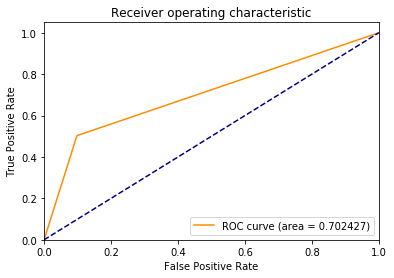

In [0]:
 from sklearn.ensemble import RandomForestClassifier
 classifier = RandomForestClassifier(n_estimators=10, max_depth=None, random_state=0)
 param_grid = {'n_estimators': [30,40,50,60,70,80,90,100,500]}
 applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test," Random Forest Decision Tree")

Random Forest  Trees are genreally fast and simple to execute and are not much affected by scaling or outliers .
Random forest works only with decision trees and tries to have as much differernt data in each instance of the data as possible   so that high variance can be nullified .Thus , this model expects to perform better .

Best parameters set found on development set: {'max_samples': 0.05, 'base_estimator__max_depth': 5}
Best Scores 0.012118579928691179
Grid scores on development set:
[0.         0.01211858 0.         0.00053197 0.         0.00688202
 0.         0.01158787 0.         0.        ] [0.         0.00426698 0.         0.00106387 0.         0.00268288
 0.         0.00356239 0.         0.        ]
 Bagging Technique
Accuracy Score: 88.727514
Confusion Matrix: 
[[12026     4]
 [ 1525     9]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12030
           1       0.69      0.01      0.01      1534

    accuracy                           0.89     13564
   macro avg       0.79      0.50      0.48     13564
weighted avg       0.87      0.89      0.84     13564

ROC Value = 0.789885


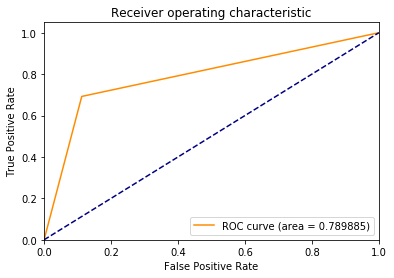

In [0]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(max_depth = 1)
classifier = BaggingClassifier(dt, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test," Bagging Technique")


Bagging techniques  makes the different instances of the data with the help of replacement techniques. Different instances will create different errors  and with the help of voting  technique , the errors are reduced  while predicting.

Best parameters set found on development set: {'n_estimators': 500, 'base_estimator__criterion': 'gini'}
Best Scores 0.21429942655897413
Grid scores on development set:
[0.18305136 0.20067038 0.20570825 0.21128343 0.21429943 0.17794532
 0.20015144 0.20423745 0.20959873 0.21359233] [0.01482965 0.01459992 0.01216166 0.01490922 0.01607239 0.0151635
 0.01957484 0.01953953 0.01898112 0.01745896]
 AdaBoostClassifier Technique
Accuracy Score: 88.978178
Confusion Matrix: 
[[11876   154]
 [ 1341   193]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12030
           1       0.56      0.13      0.21      1534

    accuracy                           0.89     13564
   macro avg       0.73      0.56      0.57     13564
weighted avg       0.86      0.89      0.86     13564

ROC Value = 0.727368


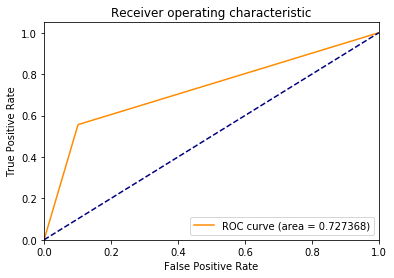

In [0]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth = 1)
classifier = AdaBoostClassifier(dt, n_estimators = 500)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "n_estimators": [100, 200,300,400,500]
             }
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test," AdaBoostClassifier Technique")


Ada Boosting is default boosting method  in which one instance tries to learn from  the  errors of other instances . 
At the time of prediction , the  result is generated by all the instances and voting method is used to get the best results

Best parameters set found on development set: {'n_estimators': 400, 'learning_rate': 0.2}
Best Scores 0.31605625477422744
Grid scores on development set:
[0.28451111 0.29817219 0.13854571 0.31029846 0.31605625 0.30719278
 0.29717511 0.30184943 0.29455915 0.31114377] [0.01761016 0.01029137 0.00588653 0.01097303 0.0193427  0.00968723
 0.01151742 0.01543501 0.01697365 0.01417834]
 Bagging Technique
Accuracy Score: 88.882336
Confusion Matrix: 
[[11733   297]
 [ 1211   323]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12030
           1       0.52      0.21      0.30      1534

    accuracy                           0.89     13564
   macro avg       0.71      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564

ROC Value = 0.713705


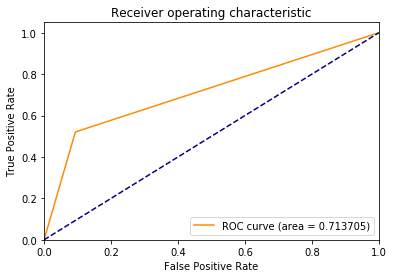

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
}
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test," Bagging Technique")


Gradient Boosting is bit ahead of ada boosting as it also uses to replace method  i.e replacing the predicting values with their square mean error and  giving them   more weightage than other data points in that partcular instance .
This   moel seems to done the best job with the data  with overall 71 % accuracy 

Best parameters set found on development set: {'num_boost_round': 1500, 'learning_rate': 0.05}
Best Scores 0.3459217955164605
Grid scores on development set:
[0.34510279 0.34129246 0.3375777  0.34364052 0.34368143 0.33661399
 0.33467727 0.3459218  0.34316016 0.31585128] [0.00988878 0.01500255 0.01827007 0.00997574 0.01450738 0.00814604
 0.00987331 0.01067264 0.00813082 0.01248945]
 Light Gradient Boosting Method
Accuracy Score: 88.742259
Confusion Matrix: 
[[11702   328]
 [ 1199   335]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12030
           1       0.51      0.22      0.30      1534

    accuracy                           0.89     13564
   macro avg       0.71      0.60      0.62     13564
weighted avg       0.86      0.89      0.87     13564

ROC Value = 0.706170


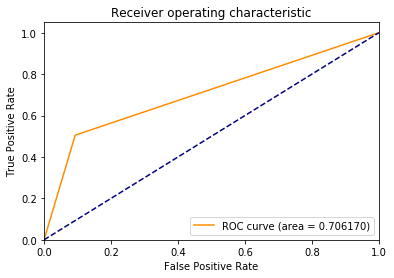

In [0]:
import lightgbm as lgb
param_grid = {
    'num_boost_round' : [500,1000,1500,2000],
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
    }

classifier = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary',  metric='auc')
applyGridSrch(classifier,param_grid,X_train,X_test, y_train, y_test," Light Gradient Boosting Method")


Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.
Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

In [0]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes' ,
              'Decision Tree','Bagging' ,'Ada Boosting' , 'Gradient Boosting' ,' Light GBM'],
    'Score': [66.6,70.2,55,65,78.9,72.7, 71.3,70.6],
     'f1-score-0':[94,94,65,93,94,94,94,94],
     'f1-score-1':[.02,25,27,29, 0.01,21,30,30] 

})
models.sort_values(by='Score', ascending=False)

,Model,Score,f1-score-0,f1-score-1
4,Bagging,78.9,94,0.01
5,Ada Boosting,72.7,94,21.00
6,Gradient Boosting,71.3,94,30.00
7,Light GBM,70.6,94,30.00
1,Random Forest,70.2,94,25.00
0,Logistic Regression,66.6,94,0.02
3,Decision Tree,65.0,93,29.00
2,Naive Bayes,55.0,65,27.00


CONCLUSION

Though the overall score for Bagfing is high , but the F1 score for '1' classifier is best given by gradient boosting.

Th would prefer go with gradient boosting.

